# <center>Построение простейших моделей прогнозирования</center>

In [184]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Загрузим и отобразим данные об объемах пассажирских авиаперевозок.

In [2]:
passengers = pd.read_csv('data/passengers.csv', index_col='date', parse_dates=True)

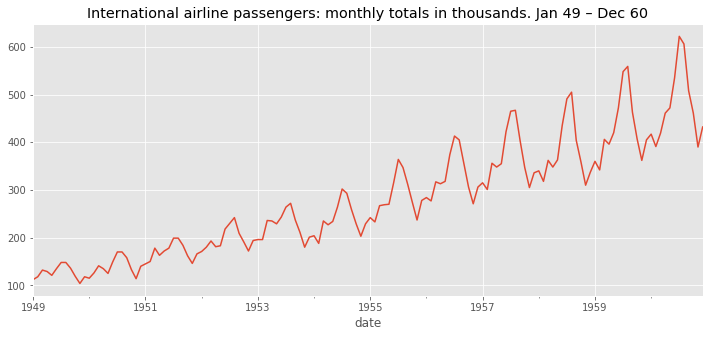

In [3]:
passengers['num_passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

Временной ряд обладает трендом и годовой сезонностью, которые должны быть учтены при построении моделей прогнозирования. Наличие тренда и сезонности проявляется на коррелограмме. Для построения коррелограммы воспользуемся функцией `plot_acf` из библиотеки `statsmodels`.

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

Опция `lags` позволяет задавать количество лагов для вычисления значений автокорреляции.

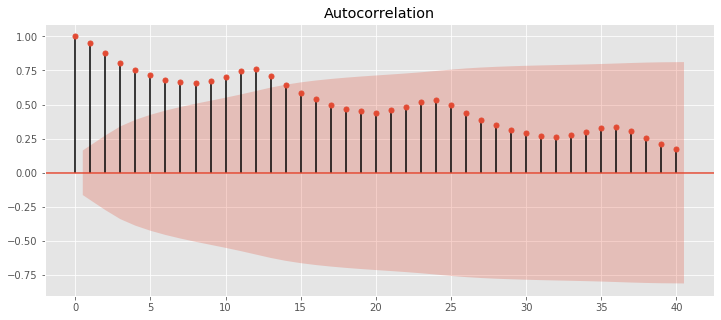

In [36]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(passengers['num_passengers'], lags=40, ax=ax)
plt.show()

<div class="alert alert-info">

<h3> Задание 1</h3>
<p></p>
Постройте наивную сезонную модель прогнозирования. Данная модель предполагает, что количество пассажиров в январе 1961 г. будет таким же, как и в январе 1960 г. С помощью полученной модели получите прогноз на 3 года вперед и отобразите результат на графике.
<p></p>
  
</div>

In [8]:
#take num of passenger in one year
data = passengers['num_passengers'].values[-12:]

In [22]:
forecast = np.concatenate(np.repeat(data, repeats=3).reshape(12, 3).T)
forecast

array([417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432, 417,
       391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432, 417, 391,
       419, 461, 472, 535, 622, 606, 508, 461, 390, 432], dtype=int64)

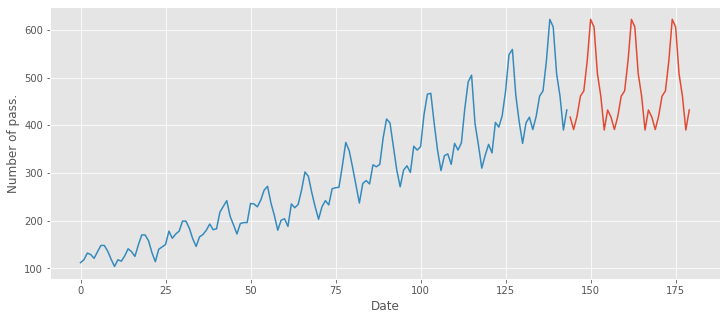

In [221]:
#forecast in 3 years
plt.subplots(figsize=(12,5))
values = np.array(data1)
x_new = np.arange(0, len(values))
x3 = np.arange(len(data1), len(data1)+len(forecast))

plt.plot(x3, forecast)
plt.plot(x_new, values)
plt.xlabel("Date")
plt.ylabel("Number of pass.")
plt.show()

<div class="alert alert-info">

<h3> Задание 2</h3>
<p></p>
Наивная сезонная модель прогнозирования не учитывает тренд временного ряда. Воспользуйтесь методом экстраполяции тренда, постройте прогноз также на 3 года и отобразите результат на графике.
    
<em>Комментарий: пока реализуйте только метод экстраполяции тренда! Не спешите объединять модели.</em>
<p></p>
  
</div>

In [89]:
data1 = passengers['num_passengers']

In [119]:
forecast1 = data1.values[-1]+36*(data1.values[-1]-data1.values[0])/(len(data1)-1)
forecast1

512.5594405594405

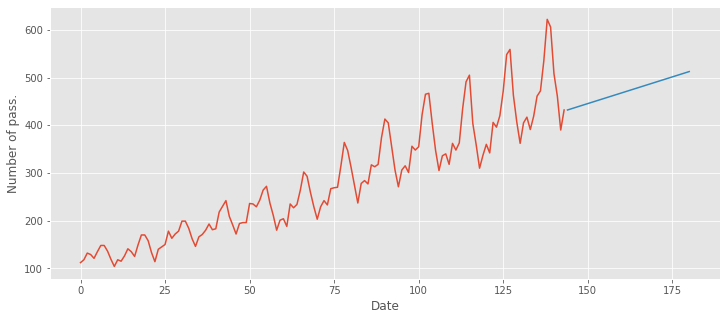

In [204]:
plt.subplots(figsize=(12,5))

values = np.array(data1)
x_new = np.arange(0, len(values))

plt.plot(x_new, values)
plt.plot([len(x_new), len(x_new)+36], [data1.values[-1], forecast1])

plt.xlabel("Date")
plt.ylabel("Number of pass.")
plt.show()

<div class="alert alert-info">

<h3> Задание 3</h3>
<p></p>
В результате выполнения предыдущих заданий вы получили две модели, каждая из которых описывает только одну из компонент ряда: либо тренд, либо сезонность. Попробуем их объединить. Для этого:
    <p></p>
    <li>вычтите из исходного ряда трендовую составляющую, постройте коррелограмму полученного ряда остатков;</li>
    <li>для ряда остатков постройте наивную сезонную модель.</li>
    
 Получите прогноз на 3 года вперед с помощью комбинации моделей. Результат отобразите на графике.
<p></p>
  
</div>

In [149]:
def f(x):
    return (forecast1 - data1[0])*x/(len(x_new)+36)+data1[0]

In [150]:
residual = data2.values - f(x_new)

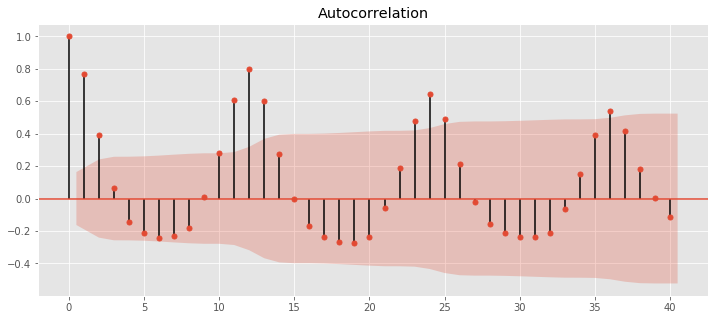

In [151]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(residual, lags=40, ax=ax)
plt.show()

In [212]:
forecast2 = np.concatenate(np.repeat(residual[-12:], repeats=3).reshape(12, 3).T)
x2 = np.arange(0, len(forecast2))

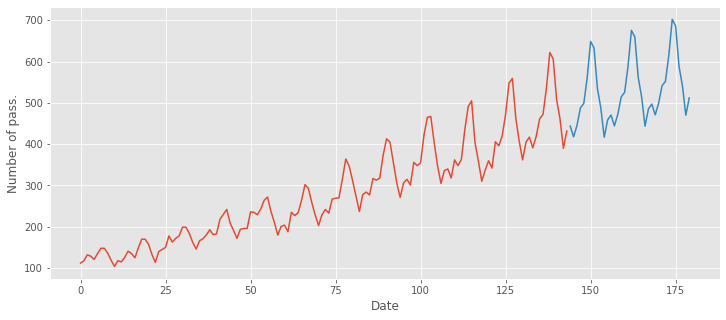

In [215]:
#forecast in 3 years
plt.subplots(figsize=(12, 5))
plt.plot(x_new, values)
x3 = np.arange(len(data1), len(data1)+len(forecast2))
plt.plot(x3, forecast2+f(x3))

plt.xlabel("Date")
plt.ylabel("Number of pass.")
plt.show()

### Мультипликативная сезонность

Во временном ряду пассажирских авиаперевозок наблюдается **мультипликативная сезонность**, которая характеризуется увеличением амплитуды сезонных колебаний. В случае когда амплитуда сезонных колебаний не меняется, говорят об **аддитивной сезонности**.

Ряд с трендом и аддитивной сезонностью может быть представлен в виде суммы его компонент:

$$y(t)=b(t)+s(t)+\epsilon(t),$$

где $b(t)$ &ndash; трендовая, $s(t)$ &ndash; сезонная, а $\epsilon(t)$ &ndash; случайная компоненты ряда.

Ряд с мультипликативной сезонностью представляет собой произведение данных компонент:

$$y(t)=b(t)\times s(t)\times \epsilon(t).$$

<div class="alert alert-info">

<h3> Задание 4</h3>
<p></p>
Постройте мультипликативную модель прогнозирования, получите прогноз на 3 года вперед и отобразите результат на графике.
<p></p>
  
</div>

In [233]:
data_new = data1/f(x_new)
forecast3 = np.concatenate(np.repeat(data_new.values[len(data_new)-\
                                                     round((len(data_new)-1)/12+1)*12:],repeats=3).reshape(12, 3).T)

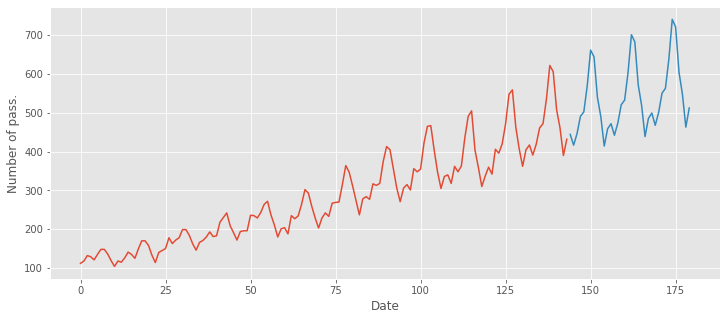

In [235]:
x2 = np.arange(0, len(forecast3))

rv = sts.norm(0, 1)
plt.subplots(figsize=(12,5))
plt.plot(x_new, values)
x3 = np.arange(len(data1), len(data1)+len(forecast3))

plt.plot(x3, f(x3)*forecast3)
plt.xlabel("Date")
plt.ylabel("Number of pass.")
plt.show()